# Descriptive Statistics

In [1]:
#imports
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter, defaultdict

In [2]:
#directory locations
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
processed_folder = parent_directory + '/data/wine-com/processed/'

### Load Data

In [3]:
#Loading the data with pandas CSV with vertical bar separator "|"
df = pd.read_csv(processed_folder + '1677432096.083379.txt', sep = '|')

In [4]:
#Inspecting the data using .head() 
df.head()

,product_url,product_name,product_variety,product_origin,product_family,user_avg_rating,user_rating_count,winemaker_description,reviewer_name,reviewer_rating,reviewer_text
0,https://www.wine.com/product/proyecto-salvaje-...,Proyecto Salvaje del Moncayo Garnacha 2020,Grenache,"from Navarra, Spain",Red Wine,4.8,19,bright burgundy wine medium depth tobacco wild...,Decanter,92.0,part proyecto garnachas de españa collection s...
1,https://www.wine.com/product/proyecto-salvaje-...,Proyecto Salvaje del Moncayo Garnacha 2020,Grenache,"from Navarra, Spain",Red Wine,4.8,19,bright burgundy wine medium depth tobacco wild...,Wilfred Wong of Wine.com,91.0,commentary 2020 proyecto garnachas salvaje del...
2,https://www.wine.com/product/domaine-du-terme-...,Domaine du Terme Gigondas 2019,Rhone Red Blends,"from Gigondas, Rhone, France",Red Wine,4.0,17,NaN,Wine & Spirits,96.0,spectacular gigondas wine red cherry flavors s...
3,https://www.wine.com/product/domaine-du-terme-...,Domaine du Terme Gigondas 2019,Rhone Red Blends,"from Gigondas, Rhone, France",Red Wine,4.0,17,NaN,Decanter,94.0,straight first sniff clear going special soari...
4,https://www.wine.com/product/scott-harvey-moun...,Scott Harvey Mountain Selection Zinfandel 2019,Zinfandel,"from Amador, Sierra Foothills, California",Red Wine,4.3,39,fruit forward rich full flavors expressing var...,Wine Enthusiast,93.0,fresh smelling full bodied flavor packed wine ...


In [5]:
# using the .info() to get a summary of the dataframe object 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20988 entries, 0 to 20987
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_url            20988 non-null  object 
 1   product_name           20988 non-null  object 
 2   product_variety        20988 non-null  object 
 3   product_origin         20986 non-null  object 
 4   product_family         20988 non-null  object 
 5   user_avg_rating        20988 non-null  float64
 6   user_rating_count      20988 non-null  int64  
 7   winemaker_description  19337 non-null  object 
 8   reviewer_name          14537 non-null  object 
 9   reviewer_rating        14537 non-null  float64
 10  reviewer_text          14494 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 1.8+ MB


To aid descriptive analysis, two subsets of this dataframe will be created based on unique winemaker descriptions and unique critical reviews.

In [8]:
#Creating a new dataframe that has only one copie of product_name 
description_df = df[['product_name', 
description_df = df[['product_name', 
                     'product_family', 
                     'user_avg_rating', 
                     'user_rating_count', 
                     'winemaker_description']].drop_duplicates(subset = ['product_name'])

In [9]:
# Creating a new dataframe that only has rewiew data 
review_df = df[['product_name', 
                'product_family', 
                'reviewer_name', 
                'reviewer_rating', 
                'reviewer_text']]

### Basic Descriptive Statistics

In [10]:
df.nunique()

product_url              13672
product_name             13672
product_variety            134
product_origin             441
product_family               5
user_avg_rating             35
user_rating_count          270
winemaker_description    12258
reviewer_name               16
reviewer_rating             13
reviewer_text            14070
dtype: int64

Of note, this dataset contains 13, 672 unique products across 134 vartietals and 5 distinct wine types. On a posotive note for this analysis, descriptions provided by wine makers do not outnumber the quantity of professional reviews.

To ensure that sufficient coverage is present across wine types, the above statistics will be recomputed for each unique wine type.

In [11]:
description_df.groupby('product_family').describe()

user_avg_rating                                     \
                                  count      mean       std  min  25%  50%   
product_family                                                               
Champagne & Sparkling            1067.0  2.192690  2.038399  0.0  0.0  3.5   
Dessert, Sherry, & Port           405.0  2.373827  2.071400  0.0  0.0  3.6   
Red Wine                         7752.0  1.192363  1.869361  0.0  0.0  0.0   
Rosé Wine                         415.0  1.305301  1.929887  0.0  0.0  0.0   
White Wine                       4033.0  1.096157  1.817765  0.0  0.0  0.0   

                                  user_rating_count                         \
                         75%  max             count       mean         std   
product_family                                                               
Champagne & Sparkling    4.1  5.0            1067.0  49.145267  135.037534   
Dessert, Sherry, & Port  4.2  5.0             405.0  32.758025   73.199245   
Red Wine                 3.6  5.0            7752.0   7.779799   35.387293   
Rosé Wine                3.8  5.0             415.0  10.344578   42.256856   
White Wine               3.4  5.0            4033.0   5.987354   28.261211   

                                                      
                         min  25%  50%   75%     max  
product_family                                        
Champagne & Sparkling    0.0  0.0  7.0  40.5  1884.0  
Dessert, Sherry, & Port  0.0  0.0  9.0  31.0   619.0  
Red Wine                 0.0  0.0  0.0   6.0  1849.0  
Rosé Wine                0.0  0.0  0.0   7.0   645.0  
White Wine               0.0  0.0  0.0   5.0  1013.0

In [12]:
review_df.groupby('product_family').describe()

reviewer_rating                                   \
                                  count       mean       std   min   25%   
product_family                                                             
Champagne & Sparkling            1553.0  92.007083  2.080983  88.0  90.0   
Dessert, Sherry, & Port           687.0  93.126638  2.376385  89.0  91.0   
Red Wine                         9205.0  92.913525  2.278310  88.0  91.0   
Rosé Wine                         237.0  91.075949  1.549512  88.0  90.0   
White Wine                       2855.0  92.177933  2.038660  88.0  91.0   

                                            
                          50%   75%    max  
product_family                              
Champagne & Sparkling    92.0  93.0  100.0  
Dessert, Sherry, & Port  93.0  95.0   99.0  
Red Wine                 93.0  94.0  100.0  
Rosé Wine                91.0  92.0   97.0  
White Wine               92.0  93.0  100.0

Looking at the product counts for each data frame indicate that there is some significant imbalance present in wines available for purchase and that the range of ratings values between user and critic reviews vary significantly.

Another aspect worth noting is that unless the text bodies of 'description' and 'review' are proven to diverge significantly, predictive models would likely benefit from combining these fields into a single corpus.

### 'Description' Analysis

In [13]:
#lifted from homwork
def descriptive_stats(tokens, num_tokens = 10, verbose=True):
    tokens_str = tokens.astype(str)
    joined_series_tokens = ' '.join(tokens_str)
    tokens = joined_series_tokens.split()
    
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    lexical_diversity = num_unique_tokens/num_tokens #defined as unique tokens to the total number of words
    num_characters = sum(len(i) for i in tokens)
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # find five most common tokens
        counter = Counter(tokens)
        n_most_common_tokens = counter.most_common(10)
        print(f"The {num_tokens} most common tokens were:\n{n_most_common_tokens}")
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])

In [14]:
unique_wines = description_df['product_family'].unique()

for wine_types in unique_wines:
    tmp = description_df[description_df['product_family'] == wine_types]
    print(f'{wine_types} Outputs\n')
    descriptive_stats(tmp['winemaker_description'])
    print('\n')

Red Wine Outputs

There are 255855 tokens in the data.
There are 13949 unique tokens in the data.
There are 1550509 characters in the data.
The lexical diversity is 0.055 in the data.
The 255855 most common tokens were:
[('wine', 5058), ('red', 4884), ('fruit', 3426), ('tannins', 2993), ('notes', 2908), ('palate', 2904), ('aromas', 2824), ('black', 2652), ('finish', 2518), ('cherry', 2226)]


White Wine Outputs

There are 130342 tokens in the data.
There are 10225 unique tokens in the data.
There are 808703 characters in the data.
The lexical diversity is 0.078 in the data.
The 130342 most common tokens were:
[('wine', 2658), ('fruit', 1596), ('palate', 1590), ('white', 1520), ('aromas', 1477), ('notes', 1471), ('fresh', 1461), ('finish', 1284), ('acidity', 1213), ('citrus', 1195)]


Champagne & Sparkling Outputs

There are 46992 tokens in the data.
There are 5724 unique tokens in the data.
There are 291806 characters in the data.
The lexical diversity is 0.122 in the data.
The 46992 m

The analysis shows that the most common tokens vary depending on the type of wine. the red wine has the most tokens related to wine characteristics like fruit, tannins, and aromas.White wines have fewer tokens, and common tokens relate to fruit, palate, and acidity.Champagne & sparkling wines have higher lexical diversity, with common tokens related to freshness, notes, and fine.Rosé wines have the highest lexical diversity, with common tokens related to rosé color, freshness, and aromas.Dessert, sherry, and port wines have a similar lexical diversity to rosé wines, with common tokens related to wine characteristics like fruit, color, and richness.

### 'Review' Analysis

In [19]:
unique_wines = review_df['product_family'].unique()

for wine_types in unique_wines:
    tmp = review_df[review_df['product_family'] == wine_types]
    print(f'{wine_types} Outputs\n')
    descriptive_stats(tmp['reviewer_text'])
    print('\n')

Red Wine Outputs

There are 337417 tokens in the data.
There are 13358 unique tokens in the data.
There are 1982860 characters in the data.
The lexical diversity is 0.040 in the data.
The 337417 most common tokens were:
[('tannins', 4972), ('fruit', 4119), ('wine', 4114), ('finish', 3565), ('black', 3483), ('nan', 3420), ('bodied', 3326), ('red', 3175), ('full', 3016), ('palate', 2957)]


White Wine Outputs

There are 94927 tokens in the data.
There are 7744 unique tokens in the data.
There are 560822 characters in the data.
The lexical diversity is 0.082 in the data.
The 94927 most common tokens were:
[('nan', 2280), ('finish', 1270), ('white', 1110), ('wine', 1057), ('palate', 1037), ('fruit', 1025), ('flavors', 956), ('aromas', 953), ('notes', 908), ('acidity', 814)]


Champagne & Sparkling Outputs

There are 52945 tokens in the data.
There are 5095 unique tokens in the data.
There are 312677 characters in the data.
The lexical diversity is 0.096 in the data.
The 52945 most common t

The number of token varies across the different types of wine, with red wines having the highest number of tokens and rose wine having the hifhest lexical diversity. The great thing is that the most common tokens vary across the different types of wine will with the classificatiion model for like navie bayes model 

Based on the top 10 most common terms, joining the fields 'description' and 'reviews' may be a reasonable proposal but a transform such as TF-IDF is likely in order for this dataset as the terms themselves are largely generic.

### Description Lengths

In [21]:
description_df['description_length'] = description_df['winemaker_description'].str.len()

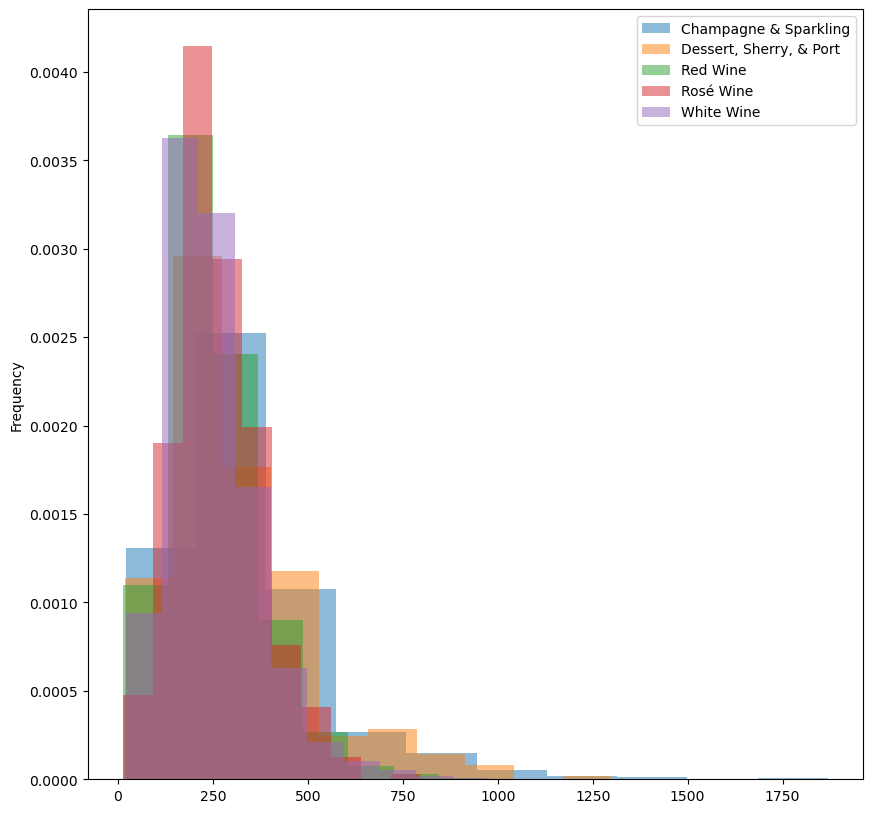

In [24]:
fig = plt.figure(figsize=(10, 10))
description_df.groupby('product_family')['description_length'].plot(kind="hist",density=True,alpha=0.5,legend=True)
plt.show()

### Review Lengths

In [25]:
review_df['review_length'] = review_df['reviewer_text'].str.len()

C:\Users\garyb\AppData\Local\Temp\ipykernel_3104\232450227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_df['review_length'] = review_df['reviewer_text'].str.len()


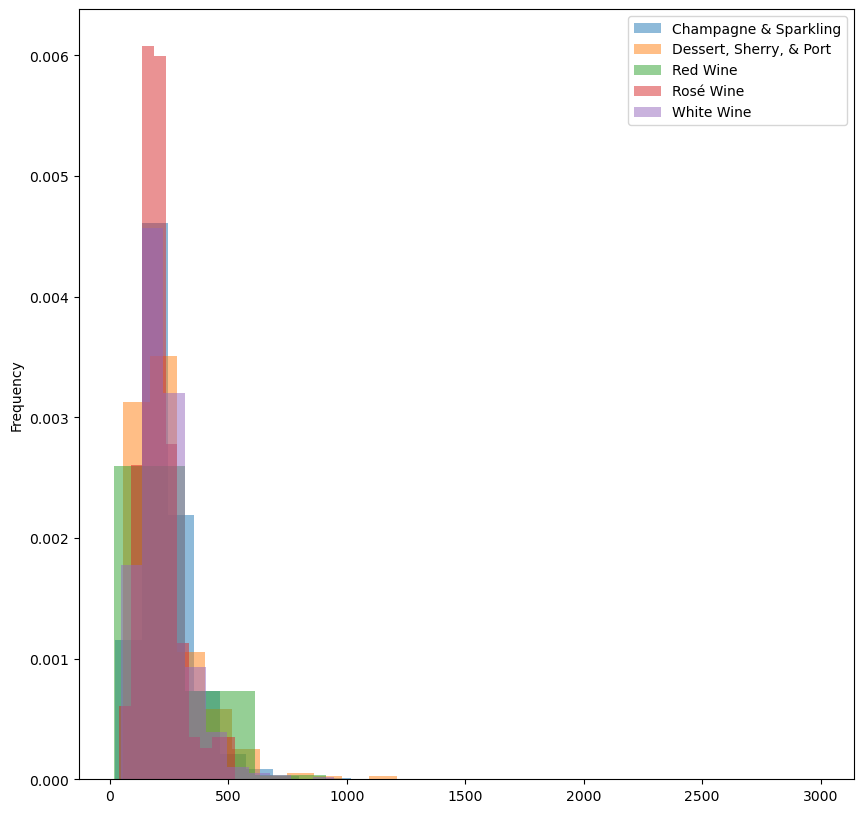

In [26]:
fig = plt.figure(figsize=(10, 10))
review_df.groupby('product_family')['review_length'].plot(kind="hist", 
                                                        density=True, 
                                                        alpha=0.5,
                                                        legend=True)
plt.show()

Interestingly, the distrbution of description and review lengths appear to follow similiar distributions.

### Description Ratings

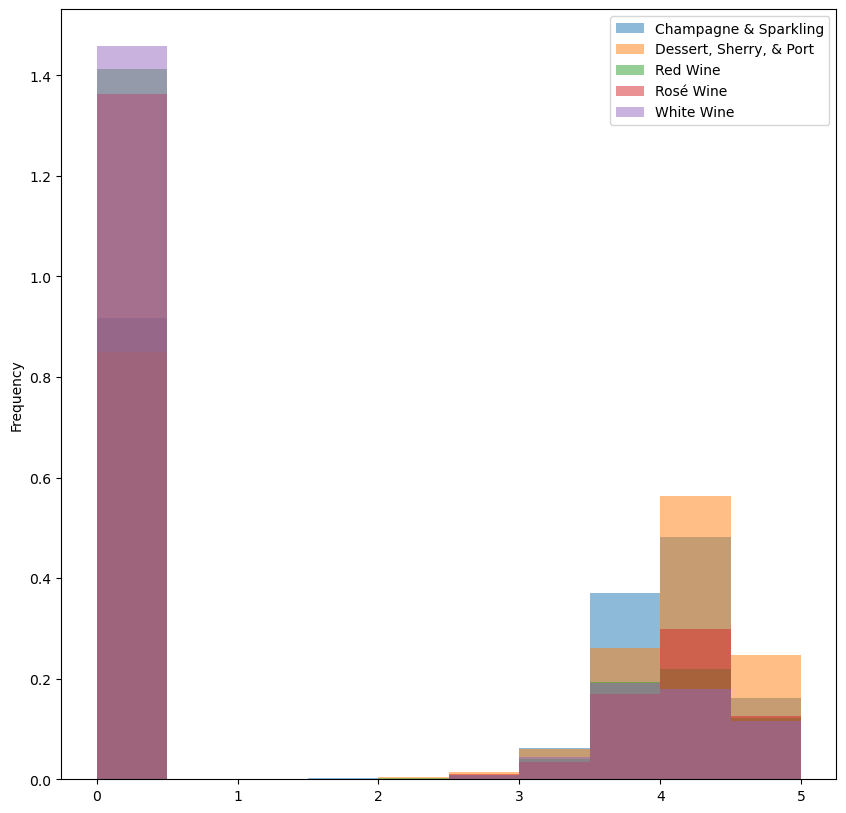

In [30]:
fig = plt.figure(figsize=(10, 10))
description_df.groupby('product_family')['user_avg_rating'].plot(kind="hist", 
                                                                density=True, 
                                                                alpha=0.5,
                                                                legend=True)
plt.show()

Interestingly, the distrbution of user rating indicates that 0.0 is the default value for wines with no user ratings. Depending on the models implemented, this could be import for implementing machine learning models to predict sentiment.

### Review Lengths

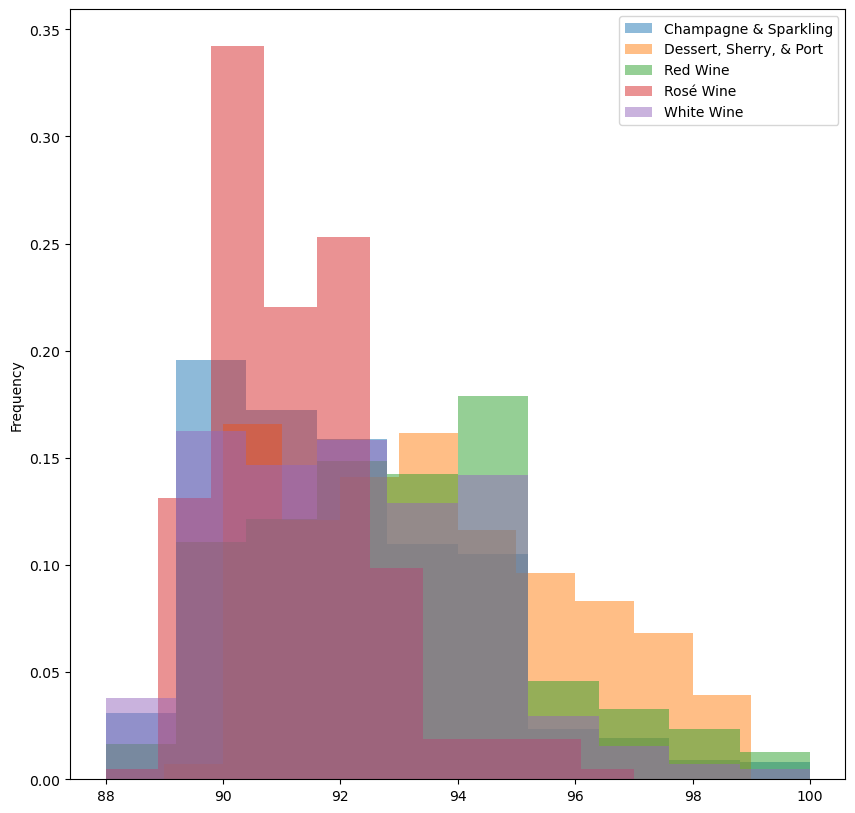

In [31]:
fig = plt.figure(figsize=(10, 10))
review_df.groupby('product_family')['reviewer_rating'].plot(kind="hist", 
                                                            density=True, 
                                                            alpha=0.5,
                                                            legend=True)
plt.show()

### Unique Tokens

Given that there are multiple labels in the set, we will modify a function from prior homework to perform OvR comparisons for terms unique to each wine type.

In [27]:
#modified from homework to be generally useful
def unique_tokens(df, comparison_column, split_column, n_total_corpora, n_top_terms):
    unique_splits = df[split_column].unique()
    for split in unique_splits:
        #perform split
        corpus_1 = df[df[split_column] == split]
        corpus_2 = df[df[split_column] != split]
        #preprocess
        corpus_1_str = corpus_1[comparison_column].astype(str)
        corpus_2_str = corpus_2[comparison_column].astype(str)
        corpus_1_joined = ' '.join(corpus_1_str)
        corpus_2_joined = ' '.join(corpus_2_str)
        corpus_1_tokens = corpus_1_joined.split()
        corpus_2_tokens = corpus_2_joined.split()
        #generate token counts for each corpora
        corpus_1_counts = Counter(corpus_1_tokens)
        corpus_2_counts = Counter(corpus_2_tokens)
        #write to dataframe
        corpus_1_df = pd.DataFrame(data = corpus_1_counts.values(), 
                               index = corpus_1_counts.keys(),
                               columns = ['1_word_counts'])
        corpus_2_df = pd.DataFrame(data = corpus_2_counts.values(), 
                               index = corpus_2_counts.keys(),
                               columns = ['2_word_counts'])
        #join dataframes
        corpus_df = corpus_1_df.merge(corpus_2_df, 
                                      how = 'outer',
                                      left_index = True, 
                                      right_index= True)
        #impute null values with 0
        corpus_df = corpus_df.fillna(0)
        #filtering corpora to required  relevance
        corpus_df = corpus_df[corpus_df['1_word_counts'] >= n_total_corpora]
        corpus_df = corpus_df[corpus_df['2_word_counts'] >= n_total_corpora]
        #calculate term concentrations
        corpus_df['1_concentrations'] = corpus_df['1_word_counts']/len(corpus_1)
        corpus_df['2_concentrations'] = corpus_df['2_word_counts']/len(corpus_2)
        #generate term ratio
        corpus_df['term_ratio'] = corpus_df['1_concentrations']/corpus_df['2_concentrations']
        #sort ratios
        corpus_df = corpus_df.sort_values(by = ['term_ratio'], ascending = False)
        #generate outputs
        corpus_1_top_n = corpus_df['term_ratio'].head(n_top_terms).to_dict()
        #print outputs
        print(f'Unique tokens observed for the label {split}:\n')
        print(corpus_1_top_n)
        print(f'\n')

### Description Unique Terms

In [28]:
unique_tokens(description_df, 
              comparison_column = 'winemaker_description', 
              split_column = 'product_family',
              n_total_corpora = 5,
              n_top_terms = 10)

Unique tokens observed for the label Red Wine:

{'garnet': 62.23942208462333, 'merlot': 48.92604059167527, 'tobacco': 44.511278195488714, 'cabernet': 40.79136147398625, 'sangiovese': 36.80908152734778, 'tannins': 32.652513637033756, 'blueberry': 31.734892787524362, 'cedar': 24.645839196922786, 'zinfandel': 23.005675954592363, 'blackberry': 22.713139585205898}


Unique tokens observed for the label White Wine:

{'riesling': 71.70096702206794, 'grigio': 49.71267046863378, 'lemongrass': 29.078725514505333, 'semillon': 26.290354574758247, 'curd': 25.99160054549963, 'tropical': 23.80277000460487, 'lime': 22.053479250726955, 'guava': 20.71361269526407, 'pineapple': 20.03074634267295, 'gooseberry': 19.41901190181007}


Unique tokens observed for the label Champagne & Sparkling:

{'champagne': 559.9597000937207, 'bubbles': 262.6230985509336, 'mousse': 122.07278975320213, 'sparkling': 74.70298803682672, 'effervescence': 52.62375394052995, 'noirs': 44.3006091846298, 'xarel': 42.1910563663141, 'b

In [29]:
unique_tokens(review_df, 
              comparison_column = 'reviewer_text', 
              split_column = 'product_family',
              n_total_corpora = 5,
              n_top_terms = 10)

Unique tokens observed for the label Red Wine:

{'cabernet': 171.31932873125447, 'purple': 85.42680314210902, 'franc': 78.41245281735641, 'blackberries': 57.549988098071886, 'leather': 47.9028802666032, 'tobacco': 42.447274458462275, 'cassis': 26.359256866279004, 'iron': 25.215543918114736, 'grained': 23.119792906450847, 'garnet': 23.09603155711225}


Unique tokens observed for the label White Wine:

{'riesling': 159.58970358814352, 'roussanne': 25.361154446177846, 'tropical': 24.742589703588145, 'clairette': 20.876560062402497, 'whites': 20.41263650546022, 'honeydew': 19.794071762870516, 'semillon': 18.041471658866357, 'passion': 17.938377535101406, 'adige': 16.701248049921997, 'oily': 13.60842433697348}


Unique tokens observed for the label Champagne & Sparkling:

{'mousse': 149.53577106518281, 'pillowy': 75.68108108108109, 'dough': 42.44932432432432, 'lacy': 39.69287469287469, 'pinpoint': 38.810810810810814, 'vinous': 38.81081081081081, 'aperitif': 38.81081081081081, 'nv': 34.40049

Observing the unique terms produced in the OvR analysis does produce an interesting insight that the reviews tend to focus more on the tasting notes of the product however the types of terms present in these outputs suppports the possiblity that these fields could be combined. Depending on the predictive application, this dynamic could be useful for informing the final model inputs.